In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
plt.style.use('ggplot')
#import lightgbm as lgb
from sklearn.preprocessing import QuantileTransformer

from sklearn.pipeline import Pipeline, make_pipeline, make_union
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from IPython.display import Audio
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
#import imblearn



x = 'Data/Bat.mp3'
def _fini(x):
    return Audio(x, autoplay=True)

from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

import time
tempsX = time.time()
def _time_():
    duration1 = time.time()-tempsX
    return print("temps de traitement       ",round(duration1/60,2), "minutes")

In [2]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system names
        if name == "PIL":
            name = "Pillow"
        elif name == "sklearn":
            name = "scikit-learn"

        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

tqdm==4.50.2
seaborn==0.11.2
scipy==1.5.2
scikit-learn==0.24.2
pandas==1.3.3
numpy==1.19.5
matplotlib==3.4.2
autopep8==1.5.4


# F(x)

In [3]:
def mEmptyCell(data):
    all_empty_cell = round((sum(data.isnull().sum())) * 100 / (len(data) * len(data.columns)))
    return print('Cellules Vides : ', all_empty_cell, '%')

In [4]:
def _data_info_(data):
    mEmptyCell(data)
    print ('DataShape : ', data.shape)

In [5]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [3]:
def Graph_Pie(labels,sizes,title): 
    # print(sizes) # adds up to 1433, which is the total number of participants
    fig1, ax1 = plt.subplots(figsize=(6, 6))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')
    plt.title(title)
    plt.show()

In [7]:
def Graph(data, x,y,string):  
    a = data.value_counts()
    a = pd.DataFrame(data=a)
    a = a.rename(columns={0 : 'Count'})
    a = a.reset_index()
    plt.figure(figsize=(7.5, 7.5))
    ax = sns.barplot(x=x, y=y, data=a, orient='h')
    plt.xticks(fontsize=15, rotation=10)
    plt.yticks(fontsize=15, rotation=10)
    plt.title(string, fontsize=20)
    return plt

def GraphNum(data, x,y,string):  
    plt.figure(figsize=(7.5, 7.5))
    ax = sns.barplot(x=x, y=y, data=data, orient='h')
    plt.title(string, fontsize=20)
    plt.xticks(fontsize=15, rotation=10)
    plt.yticks(fontsize=15, rotation=10)
    return plt

def GraphNumv2(data, x,y,string):  
    plot = data.plot.pie(subplots=True, figsize=(7.5,7.5), fontsize=15)
    plt.title(x, fontsize=20)
    plt.xticks(fontsize=15, rotation=10)
    plt.yticks(fontsize=15, rotation=10)
    return plt

In [8]:
def _fx_graph_(data, y) : 
    _graph = data[y]
    _graph = _graph.value_counts()
    _graph = pd.DataFrame(_graph)
    _graph = _graph.reset_index()
    _graph = _graph.rename(columns={"index": str(y), str(y): 'Count'})
    return _graph 

In [9]:
m_App_Test = pd.read_csv('Data/application_test.csv')
_data_info_(m_App_Test)

Cellules Vides :  24 %
DataShape :  (48744, 121)


In [10]:
m_App_Train = pd.read_csv('Data/application_train.csv')
_data_info_(m_App_Train)

Cellules Vides :  24 %
DataShape :  (307511, 122)


In [11]:
m_App_Total = m_App_Train.append(m_App_Test, sort=False)
m_App_Total = m_App_Total.sort_values(by=['SK_ID_CURR'], ascending=True)
m_App_Total.shape

(356255, 122)

In [12]:
pd.reset_option('max_columns')
pd.set_option('display.max_columns', None)

m_A_Col = pd.DataFrame(m_App_Total.columns)
m_A_Col = m_A_Col.T

m_A_Col



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121
0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [13]:
print('m_App_Train ', m_App_Train.shape)

print ('_limit_ : ',  307511/2.5)
empty_Col = pd.DataFrame(m_App_Train.isnull().sum())
empty_Col = empty_Col.reset_index()
empty_Col = empty_Col.rename(columns={'index': "_Col_Name_", 0 : "_count_" })
empty_Col = empty_Col.sort_values(by=['_count_'], ascending=True)

print('empty_Col ', empty_Col.shape)
empty_Col = empty_Col.loc[empty_Col['_count_'] < 142502]
print('empty_Col :', empty_Col.shape)

# Drop Empty Col

_k_ = empty_Col._Col_Name_

m_App_T_1  = m_App_Train[_k_]
m_App_T_1.columns


# Clean  1 ---------------

m_App_T_2 = m_App_T_1.copy()
m_App_T_2.columns

_drop_ = ['NAME_TYPE_SUITE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT']

m_App_T_2 = m_App_T_2.drop(_drop_, axis=1)

# Clean  2 ---------------
m_App_T_3 = m_App_T_1.copy()

_flag_ = [ 'FLAG_DOCUMENT_21',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_2']

m_App_T_3["_flag_doc_"] = m_App_T_3[_flag_].sum(axis=1)
m_App_T_3 = m_App_T_3.drop(_flag_, axis=1)
m_App_T_3.shape

# Clean  3 ---------------

m_App_T_4 = m_App_T_3.copy()
_reg_ = [ 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
        'LIVE_CITY_NOT_WORK_CITY']

m_App_T_4["_live_not_"] = m_App_T_4[_reg_].sum(axis=1)
m_App_T_4 = m_App_T_4.drop(_reg_, axis=1)
m_App_T_4.shape



# Clean 4 ---------------

m_App_T_5 = m_App_T_4.copy()
m_App_T_5

_drop_2_ = ['WEEKDAY_APPR_PROCESS_START',
'HOUR_APPR_PROCESS_START',
'DAYS_ID_PUBLISH',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR']


m_App_T_5 = m_App_T_5.drop(_drop_2_, axis=1)
m_App_T_5.shape

# Clean 5 ---------------

m_App_T_6 = m_App_T_5.copy()

_flag_phone_ = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']

m_App_T_6["_flag_phone_"] = m_App_T_6[_flag_phone_].sum(axis=1)
m_App_T_6 = m_App_T_6.drop(_flag_phone_, axis=1)
m_App_T_6.shape

# Clean 6 ---------------

m_App_T_8 = m_App_T_6.copy()
m_App_T_8 = m_App_T_8.rename(columns={"SK_ID_CURR":"_ID_",
"OCCUPATION_TYPE":"_DESC_CSP_",
"ORGANIZATION_TYPE":"_DESC_Employeur_",
"FLAG_OWN_REALTY":"_DESC_proprio_logement_",
"FLAG_OWN_CAR":"_DESC_proprio_voiture_",
"NAME_TYPE_SUITE":"_DESC_Qui_Accompagne_",
"CODE_GENDER":"_DESC_sexe_",
"NAME_INCOME_TYPE":"_DESC_Source_Revenu_",
"NAME_FAMILY_STATUS":"_DESC_Statut_Familial_",
"NAME_CONTRACT_TYPE":"_DESC_Type_contrat_",
"NAME_EDUCATION_TYPE":"_DESC_Type_Diplome_",
"NAME_HOUSING_TYPE":"_DESC_Type_Logement_",
"AMT_ANNUITY":"_MNT_des_Rentes_",
"AMT_CREDIT":"_MNT_du_Credit_",
"AMT_INCOME_TOTAL":"_MNT_Total_des_revenus_",
"AMT_GOODS_PRICE":"_MNT_GOODS_PRICE",
"DAYS_LAST_PHONE_CHANGE":"_NB_Jour_depuis_achat_phone_",
"DAYS_EMPLOYED":"_NB_Jour_depuis_emploi_",
"DAYS_BIRTH":"_NB_Jour_depuis_naissance_",
"CNT_CHILDREN":"_NBR_d_Enfants_",
"CNT_FAM_MEMBERS":"_NBR_personnes_ds_foyer_",
"DEF_30_CNT_SOCIAL_CIRCLE":"_SC_defaut_paiement_30_1_",
"OBS_30_CNT_SOCIAL_CIRCLE":"_SC_defaut_paiement_30_2_",
"DEF_60_CNT_SOCIAL_CIRCLE":"_SC_defaut_paiement_60_1_",
"OBS_60_CNT_SOCIAL_CIRCLE":"_SC_defaut_paiement_60_2_",
"REGION_RATING_CLIENT":"_SC_Evaluation_credit_region_",
"REGION_RATING_CLIENT_W_CITY":"_SC_Evaluation_credit_ville_",
"_flag_doc_":"_SC_info_Doc_",
"_flag_phone_":"_SC_info_Phone_",
"_live_not_":"_SC_info_Region_",
"REGION_POPULATION_RELATIVE":"_SC_population_normalisée_",
"EXT_SOURCE_2":"_SC_source_2_",
"EXT_SOURCE_3":"_SC_source_3_",
"TARGET":"_TARGET_"})

m_App_T_8 = m_App_T_8[[
'_ID_',
'_TARGET_',
'_DESC_CSP_',
'_DESC_Employeur_',
'_DESC_proprio_logement_',
'_DESC_proprio_voiture_',
'_DESC_Qui_Accompagne_',
'_DESC_sexe_',
'_DESC_Source_Revenu_',
'_DESC_Statut_Familial_',
'_DESC_Type_contrat_',
'_DESC_Type_Diplome_',
'_DESC_Type_Logement_',
'_MNT_des_Rentes_',
'_MNT_du_Credit_',
'_MNT_Total_des_revenus_',
'_MNT_GOODS_PRICE',
'_NB_Jour_depuis_achat_phone_',
'_NB_Jour_depuis_emploi_',
'_NB_Jour_depuis_naissance_',
'_NBR_d_Enfants_',
'_NBR_personnes_ds_foyer_',
'_SC_defaut_paiement_30_1_',
'_SC_defaut_paiement_30_2_',
'_SC_defaut_paiement_60_1_',
'_SC_defaut_paiement_60_2_',
'_SC_Evaluation_credit_region_',
'_SC_Evaluation_credit_ville_',
'_SC_info_Doc_',
'_SC_info_Phone_',
'_SC_info_Region_',
'_SC_population_normalisée_',
'_SC_source_2_',
'_SC_source_3_'
]]




m_App_Train  (307511, 122)
_limit_ :  123004.4
empty_Col  (122, 2)
empty_Col : (73, 2)


# --------------------------------
#     GRAPH
# -------------------------------

import matplotlib.pyplot as plt

def _fx_graph_line_plot(data, col , title):
    _graph = data[col]
    _graph = _graph.value_counts()
    _graph = pd.DataFrame(_graph)
    _graph = _graph.reset_index()
    _graph = _graph.rename(columns={"index": str(col), str(col): 'Count'})
    plt.figure(figsize=(15, 7))
    sns.set(font_scale=1.3)
    ax = sns.barplot(x='Count', y=str(col), data=_graph, orient='h', saturation=0.7)
    plt.xticks(rotation=80)
    plt.title(title, fontsize=35)

def _fx_graph_(data, col ,title):
    _graph = data[col]
    _graph = _graph.value_counts()
    _graph = pd.DataFrame(_graph)
    _graph = _graph.reset_index()
    _graph = _graph.rename(columns={"index": str(col), str(col): 'Count'})
    return _graph, col
    
def _fx_graph_line_plot(data, col , title):
    df, col = _fx_graph_(data, col , title)
    #plt.figure(figsize=(15, 7))
    sns.set(font_scale=1.3)
       plt.figure(figsize=(15, 7))
 
    ax = sns.barplot(x='Count', y=str(col), data=df, orient='h', saturation=0.7)
    plt.xticks(rotation=80)
    plt.title(title, fontsize=35)  
    import matplotlib.pyplot as plt




# 1 -  NAME_CONTRACT_TYPE

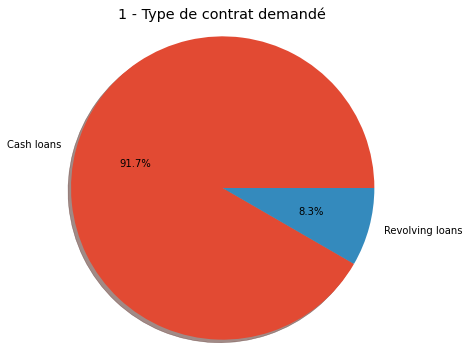

In [14]:
a1 = _fx_graph_(m_App_Total,'NAME_CONTRACT_TYPE')


Graph_Pie(a1.NAME_CONTRACT_TYPE,a1.Count , '1 - Type de contrat demandé' )


# 2 - TARGET

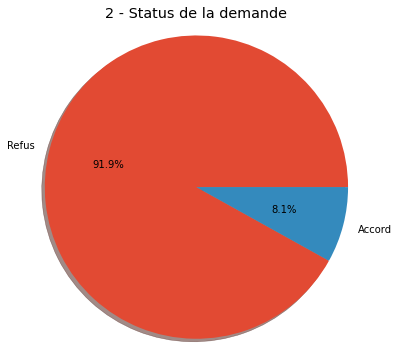

In [15]:
a2 = _fx_graph_(m_App_Total, 'TARGET')
a2.insert(2, "Statut", ["Refus", "Accord"], True)
Graph_Pie(a2.Statut,a2.Count , '2 - Status de la demande' )

# 3 - CODE_GENDER

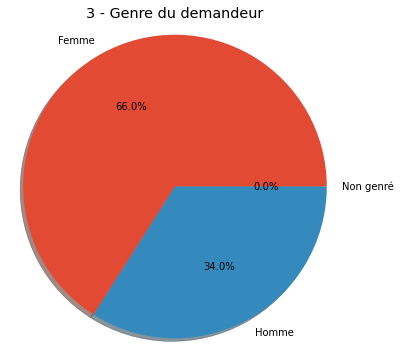

In [16]:
_graph = _fx_graph_(m_App_Total, 'CODE_GENDER')
_graph['CODE_GENDER'] = _graph['CODE_GENDER'].replace('F' , 'Femme')
_graph['CODE_GENDER'] = _graph['CODE_GENDER'].replace('M' , 'Homme')
_graph['CODE_GENDER'] = _graph['CODE_GENDER'].replace('XNA' , 'Non genré')

Graph_Pie(_graph.CODE_GENDER,_graph.Count , '3 - Genre du demandeur' )

# 4 - FLAG_OWN_CAR

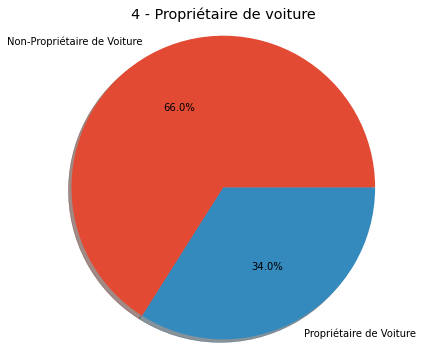

In [17]:
_graph = _fx_graph_(m_App_Total, 'FLAG_OWN_CAR')
_graph['FLAG_OWN_CAR'] = _graph['FLAG_OWN_CAR'].replace('Y' , 'Propriétaire de Voiture')
_graph['FLAG_OWN_CAR'] = _graph['FLAG_OWN_CAR'].replace('N' , 'Non-Propriétaire de Voiture')
_graph


Graph_Pie(_graph.FLAG_OWN_CAR,_graph.Count , '4 - Propriétaire de voiture' )

# 5 - FLAG_OWN_REALTY

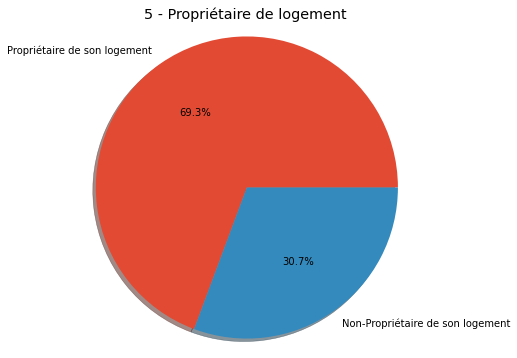

In [18]:
_graph = _fx_graph_(m_App_Total, 'FLAG_OWN_REALTY')
_graph['FLAG_OWN_REALTY'] = _graph['FLAG_OWN_REALTY'].replace('Y' , 'Propriétaire de son logement')
_graph['FLAG_OWN_REALTY'] = _graph['FLAG_OWN_REALTY'].replace('N' , 'Non-Propriétaire de son logement')

Graph_Pie(_graph.FLAG_OWN_REALTY,_graph.Count , '5 - Propriétaire de logement' )

# 6 - CNT_CHILDREN

<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py'>

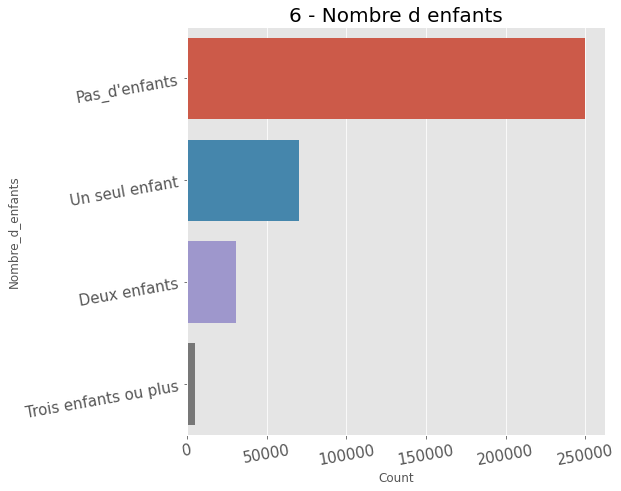

In [19]:
m01_A = [
        (m_App_Total['CNT_CHILDREN'] == 0),
        (m_App_Total['CNT_CHILDREN'] == 1)  ,
        (m_App_Total['CNT_CHILDREN'] == 2)  ,
        (m_App_Total['CNT_CHILDREN'] >= 3)]

m01_B = ["Pas_d'enfants", "Un seul enfant", "Deux enfants","Trois enfants ou plus"]

m01_C = np.select(m01_A, m01_B)
m01_C = pd.DataFrame(data=m01_C)
a6 = pd.DataFrame(m01_C[0].value_counts())
a6 = a6.reset_index()
a6 = a6.rename(columns={"index": "Nombre_d_enfants", 0: 'Count'})

#def GraphNum(data, x,y,string):  
GraphNum(a6, "Count","Nombre_d_enfants",'6 - Nombre d enfants')
    
    

# 7 - ... 
PERSONNE VIVANT DANS LE FOYER

# ...

In [20]:
a = pd.DataFrame(m_App_Total['AMT_INCOME_TOTAL'])
b = pd.DataFrame(m_App_Total['AMT_CREDIT'])
c = pd.DataFrame(m_App_Total['AMT_ANNUITY'])

In [21]:
c.quantile([.2, .4, .6, 0.8])

,AMT_ANNUITY
0.2,14944.5
0.4,21942.0
0.6,28350.0
0.8,37800.0


# 8  - Rente Annuel 

<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py'>

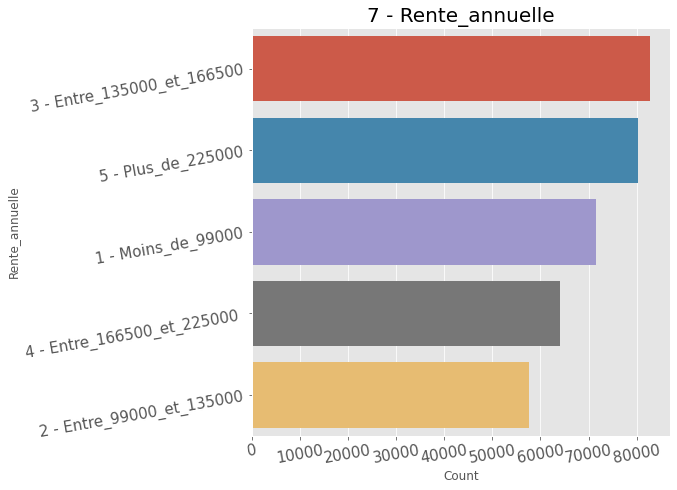

In [22]:
a = m_App_Total['AMT_INCOME_TOTAL']

m01_A = [
        (a <= 99000),
        (a >= 99000)    & (a < 135000.0) ,
        (a >= 135000.0) & (a < 166500.0) ,
        (a >= 166500.0) & (a < 225000.0) ,
        (a >= 225000.0) ]

m01_B = ["1 - Moins_de_99000", 
         '2 - Entre_99000_et_135000', 
         "3 - Entre_135000_et_166500",
         "4 - Entre_166500_et_225000 ",
         "5 - Plus_de_225000"]

m01_C = np.select(m01_A, m01_B)
m01_C = pd.DataFrame(data=m01_C)
a7 = m01_C[0].value_counts()
a7 = pd.DataFrame(a7)
a7 = a7.reset_index()
a7 = a7.rename(columns={"index": "Rente_annuelle", 0: 'Count'})


GraphNum(a7, "Count","Rente_annuelle",'7 - Rente_annuelle')

# 9 - Demande de credit

<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py'>

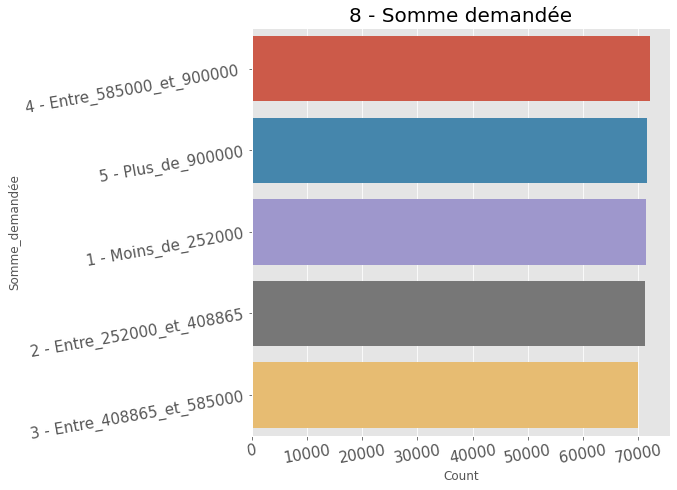

In [23]:
b = m_App_Total['AMT_CREDIT']

m01_A = [
        (b <= 252000.0),
        (b >= 252000.0)    & (b < 408865.5) ,
        (b >= 408865.5) & (b < 585000.0) ,
        (b >= 585000.0) & (b < 900000.0) ,
        (b >= 900000.0) ]

m01_B = ["1 - Moins_de_252000", 
         '2 - Entre_252000_et_408865', 
         "3 - Entre_408865_et_585000",
         "4 - Entre_585000_et_900000 ",
         "5 - Plus_de_900000"]

m01_C = np.select(m01_A, m01_B)
m01_C = pd.DataFrame(data=m01_C)
a8 = m01_C[0].value_counts()

a8 = pd.DataFrame(a8)
a8 = a8.reset_index()
a8 = a8.rename(columns={"index": "Somme_demandée", 0: 'Count'})


GraphNum(a8, "Count","Somme_demandée",'8 - Somme demandée')

# 10 - Salaire Annuel

<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py'>

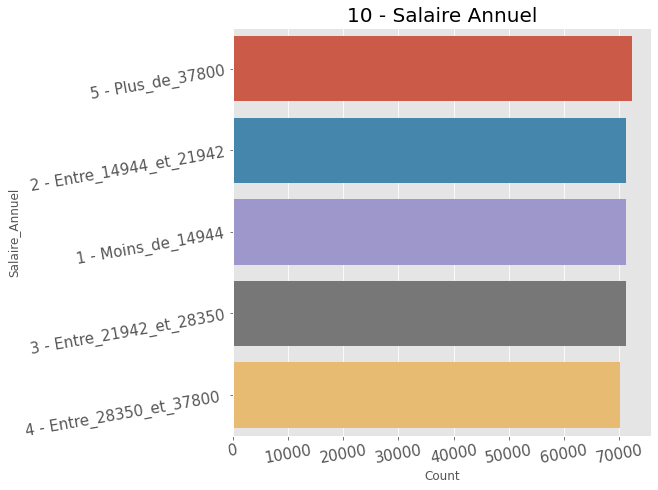

In [24]:
c = pd.DataFrame(m_App_Total['AMT_ANNUITY'])

c['AMT_ANNUITY'] = c['AMT_ANNUITY'].replace(0 , 2)



m01_A = [(c < 14944.0),
        (c > 14944.0) & (c < 21942.5) ,
        (c >= 21942.5) & (c < 28350.0) ,
        (c >= 28350.0) & (c < 37800.0) ,
        (c >= 37800.0) ]

m01_B = ["1 - Moins_de_14944", 
         '2 - Entre_14944_et_21942', 
         "3 - Entre_21942_et_28350",
         "4 - Entre_28350_et_37800 ",
         "5 - Plus_de_37800"]

m01_C = np.select(m01_A, m01_B)
m01_C = pd.DataFrame(data=m01_C)
m01_C = m01_C.sort_values(by=[0], ascending=True)
m01_C[0] = m01_C[0].replace('0' , '1 - Moins_de_14944')

a9 = m01_C[0].value_counts()

a9 = pd.DataFrame(a9)
a9 = a9.reset_index()
a9 = a9.rename(columns={"index": "Salaire_Annuel", 0: 'Count'})


GraphNum(a9, "Count","Salaire_Annuel",'10 - Salaire Annuel')

# 11 - Status Fam

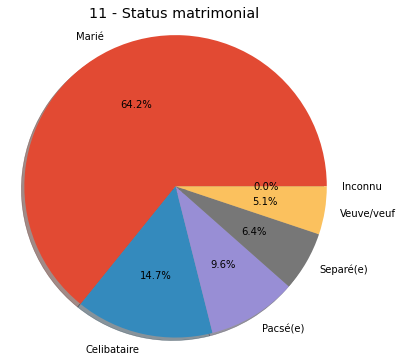

In [25]:
_graph = _fx_graph_(m_App_Total, 'NAME_FAMILY_STATUS')
_graph['NAME_FAMILY_STATUS'] = _graph['NAME_FAMILY_STATUS'].replace('Married' , 'Marié')
_graph['NAME_FAMILY_STATUS'] = _graph['NAME_FAMILY_STATUS'].replace('Single / not married' , 'Celibataire')
_graph['NAME_FAMILY_STATUS'] = _graph['NAME_FAMILY_STATUS'].replace('Widow', 'Veuve/veuf')
_graph['NAME_FAMILY_STATUS'] = _graph['NAME_FAMILY_STATUS'].replace('Civil marriage' , 'Pacsé(e)')
_graph['NAME_FAMILY_STATUS'] = _graph['NAME_FAMILY_STATUS'].replace('Unknown' , 'Inconnu')
_graph['NAME_FAMILY_STATUS'] = _graph['NAME_FAMILY_STATUS'].replace('Separated' , 'Separé(e)')


Graph_Pie(_graph.NAME_FAMILY_STATUS,_graph.Count , '11 - Status matrimonial' )

# 12  - Status Edu

<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py'>

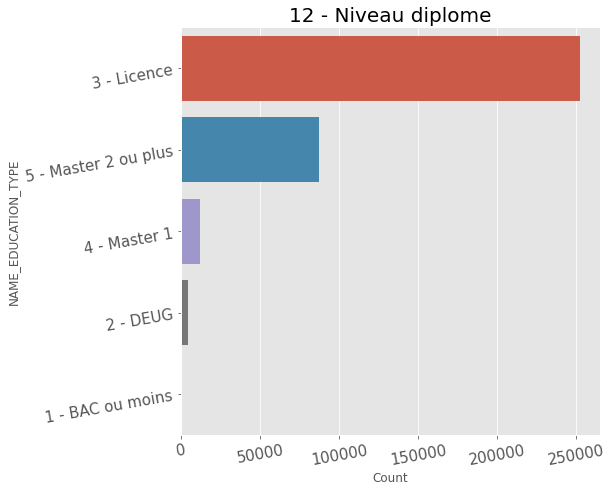

In [26]:
_graph = _fx_graph_(m_App_Total, 'NAME_EDUCATION_TYPE')
_graph['NAME_EDUCATION_TYPE'] = _graph['NAME_EDUCATION_TYPE'].replace('Secondary / secondary special' , '3 - Licence')
_graph['NAME_EDUCATION_TYPE'] = _graph['NAME_EDUCATION_TYPE'].replace('Higher education' , '5 - Master 2 ou plus')
_graph['NAME_EDUCATION_TYPE'] = _graph['NAME_EDUCATION_TYPE'].replace('Incomplete higher', '4 - Master 1')
_graph['NAME_EDUCATION_TYPE'] = _graph['NAME_EDUCATION_TYPE'].replace('Lower secondary' , '2 - DEUG')
_graph['NAME_EDUCATION_TYPE'] = _graph['NAME_EDUCATION_TYPE'].replace('Academic degree' , '1 - BAC ou moins')

#Graph_Pie(_graph.NAME_EDUCATION_TYPE,_graph.Count , '12 - Status matrimonial' )
GraphNum(_graph, "Count","NAME_EDUCATION_TYPE",'12 - Niveau diplome')



# 13 - Type d'occupation - 1

<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py'>

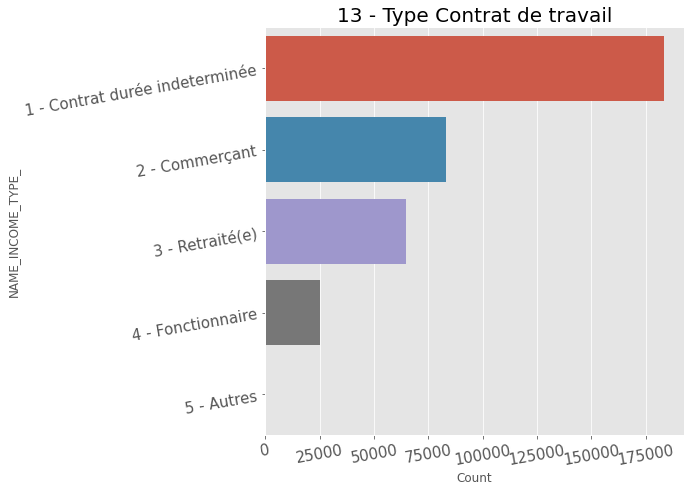

In [27]:
_graph = _fx_graph_(m_App_Total, 'NAME_INCOME_TYPE')
_graph['NAME_INCOME_TYPE'] = _graph['NAME_INCOME_TYPE'].replace('Working' , '1 - Contrat durée indeterminée')
_graph['NAME_INCOME_TYPE'] = _graph['NAME_INCOME_TYPE'].replace('Commercial associate' , '2 - Commerçant')
_graph['NAME_INCOME_TYPE'] = _graph['NAME_INCOME_TYPE'].replace('Pensioner' , '3 - Retraité(e)')
_graph['NAME_INCOME_TYPE'] = _graph['NAME_INCOME_TYPE'].replace('State servant' , '4 - Fonctionnaire')
_graph['NAME_INCOME_TYPE'] = _graph['NAME_INCOME_TYPE'].replace('Unemployed' , '5 - Autre')
_graph['NAME_INCOME_TYPE'] = _graph['NAME_INCOME_TYPE'].replace('Student' , '5 - Autre')
_graph['NAME_INCOME_TYPE'] = _graph['NAME_INCOME_TYPE'].replace('Businessman' , '5 - Autre')
_graph['NAME_INCOME_TYPE'] = _graph['NAME_INCOME_TYPE'].replace('Maternity leave' , '5 - Autre')

column_list = [4,5,6,7]
_graph = _graph.T
_graph["5 - Autres_"] = _graph[column_list].sum(axis=1)
_graph = _graph.T

_graph = _graph.drop(4)
_graph = _graph.drop(5)
_graph = _graph.drop(6)
_graph = _graph.drop(7)

_graph
#GraphNum(_graph, "Count","NAME_INCOME_TYPE",'13 - Type d emploi')
_graph.insert(2, "NAME_INCOME_TYPE_", ['1 - Contrat durée indeterminée', 
                                       '2 - Commerçant',
                                       '3 - Retraité(e)',
                                       '4 - Fonctionnaire',
                                       '5 - Autres'], True)

GraphNum(_graph, "Count","NAME_INCOME_TYPE_",'13 - Type Contrat de travail')

# 14 - Type d'occupation - 2

<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py'>

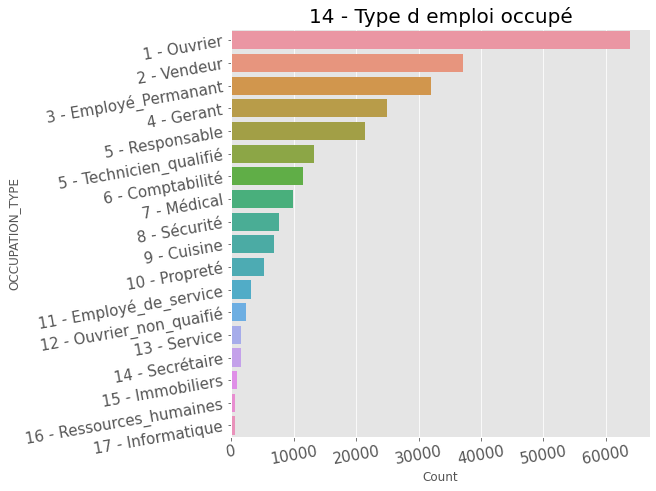

In [28]:
_graph = _fx_graph_(m_App_Total, 'OCCUPATION_TYPE')

_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Working' , '1 - En Poste')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Commercial associate' , '2 - Commerçant')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Pensioner' , '3 - Retraité(e)')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('State servan' , '4 - Fonctionnaire')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Unemployed' , '5 - Sans Emploi')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Student' , '6 - Etudiant')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Businessman' , '7 - Entrepreneur')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Maternity leave' , '8 - Congés Maternité')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Working' , '1 - En Poste')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Commercial associate' , '2 - Commerçant')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Pensioner' , '3 - Retraité(e)')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('State servan' , '4 - Fonctionnaire')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Unemployed' , '5 - Sans Emploi')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Student' , '6 - Etudiant')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Businessman' , '7 - Entrepreneur')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Maternity leave' , '8 - Congés Maternité')


_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Laborers', '1 - Ouvrier')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Sales staff' , '2 - Vendeur')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Core staff', '3 - Employé_Permanant')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Managers', '4 - Gerant')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Drivers', '5 - Responsable')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('High skill tech staff', '5 - Technicien_qualifié')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Accountants', '6 - Comptabilité')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Medicine staff', '7 - Médical')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Security staff', '8 - Sécurité')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Cooking staff', '9 - Cuisine')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Cleaning staff', '10 - Propreté')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Private service staff', '11 - Employé_de_service')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Low-skill Laborers', '12 - Ouvrier_non_quaifié')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Waiters/barmen staff', '13 - Service')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Secretaries', '14 - Secrétaire')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('Realty agents', '15 - Immobiliers')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('HR staff', '16 - Ressources_humaines')
_graph['OCCUPATION_TYPE'] = _graph['OCCUPATION_TYPE'].replace('IT staff', '17 - Informatique')


GraphNum(_graph, "Count","OCCUPATION_TYPE",'14 - Type d emploi occupé')

# 15 - DAYS_BIRTH

<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py'>

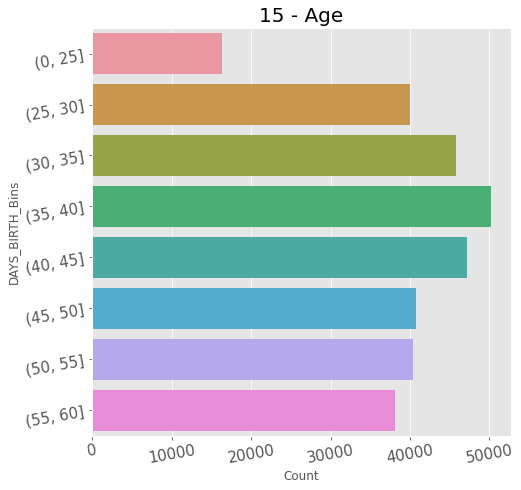

In [29]:
a = pd.DataFrame(m_App_Total.DAYS_BIRTH)
a.DAYS_BIRTH = round(a.DAYS_BIRTH / -365)
a['DAYS_BIRTH_Bins'] = pd.cut(x=a['DAYS_BIRTH'], bins=[0, 25, 30, 35,40,45,50,55,60])
a15 = _fx_graph_(a, 'DAYS_BIRTH_Bins')

GraphNum(a15, "Count","DAYS_BIRTH_Bins",'15 - Age')

# 16 - DAYS_EMPLOYED

<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py'>

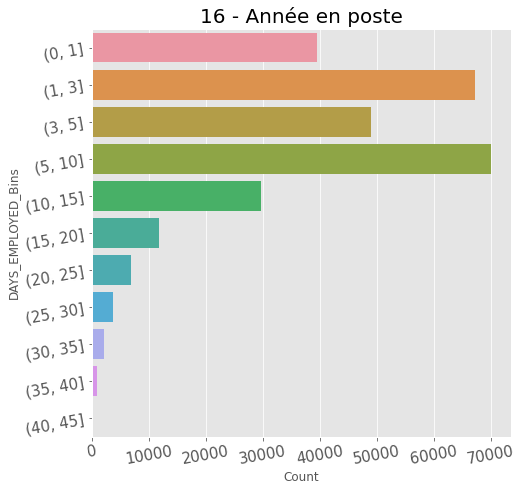

In [30]:
a = pd.DataFrame(m_App_Total.DAYS_EMPLOYED)
a.DAYS_EMPLOYED = round(a.DAYS_EMPLOYED / -365)
a['DAYS_EMPLOYED_Bins'] = pd.cut(x=a['DAYS_EMPLOYED'], bins=[0, 1, 3 , 5, 10, 15, 20, 25, 30, 35,40,45])
a16 = _fx_graph_(a, 'DAYS_EMPLOYED_Bins')


GraphNum(a16, "Count","DAYS_EMPLOYED_Bins",'16 - Année en poste')

# 17 - CNT_SOCIAL_CIRCLE

In [31]:
from sklearn.decomposition import PCA

_obs_ = ['SK_ID_CURR','TARGET' ,'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
a17 = m_App_Total[_obs_]
a17 = a17.set_index('SK_ID_CURR')
a17 = a17.dropna()

from sklearn import manifold, decomposition
a170 = a17[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']]
# 1 - PCA 
print("Dimensions dataset avant réduction PCA : ", a170.shape)
pca = PCA(n_components=1)
feat_pca= pca.fit_transform(a170)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

feat_pca = pd.DataFrame(feat_pca)
feat_pca = feat_pca.rename(columns={0 : 'pca_1'})
feat_pca = feat_pca.join(a17['TARGET'])
feat_pca = feat_pca.dropna()


feat_pca = feat_pca.sort_values(by=['TARGET'], ascending=True)
feat_pca.groupby('TARGET').describe()



Dimensions dataset avant réduction PCA :  (306490, 4)
Dimensions dataset après réduction PCA :  (306490, 1)


pca_1                                                              \
           count      mean       std       min       25%       50%       75%   
TARGET                                                                         
0.0     163139.0  0.001095  3.491154 -2.005832 -2.005832 -2.005832  0.818634   
1.0      14458.0 -0.043810  3.177161 -2.005832 -2.005832 -2.005832  0.818634   

                    
               max  
TARGET              
0.0     488.830192  
1.0      34.154613

In [32]:
from sklearn import manifold, decomposition
a170 = a17[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']]
# 1 - PCA 
print("Dimensions dataset avant réduction PCA : ", a170.shape)
pca = PCA(n_components=1)
feat_pca= pca.fit_transform(a170)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

feat_pca = pd.DataFrame(feat_pca)
feat_pca = feat_pca.rename(columns={0 : 'pca_1'})
feat_pca = feat_pca.join(a17['TARGET'])
feat_pca = feat_pca.dropna()


feat_pca = feat_pca.sort_values(by=['TARGET'], ascending=True)
feat_pca.groupby('TARGET').describe()


Dimensions dataset avant réduction PCA :  (306490, 4)
Dimensions dataset après réduction PCA :  (306490, 1)


pca_1                                                              \
           count      mean       std       min       25%       50%       75%   
TARGET                                                                         
0.0     163139.0  0.001095  3.491154 -2.005832 -2.005832 -2.005832  0.818634   
1.0      14458.0 -0.043810  3.177161 -2.005832 -2.005832 -2.005832  0.818634   

                    
               max  
TARGET              
0.0     488.830192  
1.0      34.154613

# 18 - EXT_SOURCE

from sklearn.decomposition import PCA


_ExSrc_ = ['SK_ID_CURR','TARGET' ,'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']
a18 = m_App_Total[_ExSrc_]
a18 = a18.set_index('SK_ID_CURR')

from sklearn import manifold, decomposition
a180 = a18[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
a180 = imp_mean.fit_transform(a180)
a180 = pd.DataFrame(a180)

# 1 - PCA 
print("Dimensions dataset avant réduction PCA : ", a180.shape)
pca = PCA(n_components=2)
feat_pca= pca.fit_transform(a180)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Sum_of_squared_distances = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(feat_pca)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 42)
y_kmeans = pd.DataFrame(kmeans.fit_predict(feat_pca))

a181 = a18.reset_index()
a181 = a181.join(y_kmeans)

a182 = a181[['TARGET',0]]
a182.TARGET.value_counts()

In [ ]:
a182[0].value_counts()

In [ ]:
a18

# Features Importances

In [79]:
m_App_T_10 = m_App_T_9.copy()

m_App_T_10.pop('_ID_')
y = m_App_T_10.pop('_TARGET_')
X = m_App_T_10

categorical_features  = ['_DESC_CSP_', '_DESC_Employeur_', '_DESC_proprio_logement_',
       '_DESC_proprio_voiture_', '_DESC_Qui_Accompagne_', '_DESC_sexe_',
       '_DESC_Source_Revenu_', '_DESC_Statut_Familial_', '_DESC_Type_contrat_',
       '_DESC_Type_Diplome_', '_DESC_Type_Logement_']
numeric_features = [ '_MNT_des_Rentes_',
       '_MNT_du_Credit_', '_MNT_Total_des_revenus_', '_MNT_GOODS_PRICE',
       '_NB_Jour_depuis_achat_phone_', '_NB_Jour_depuis_emploi_',
       '_NB_Jour_depuis_naissance_', '_NBR_d_Enfants_',
       '_NBR_personnes_ds_foyer_', '_SC_defaut_paiement_30_1_',
       '_SC_defaut_paiement_30_2_', '_SC_defaut_paiement_60_1_',
       '_SC_defaut_paiement_60_2_', '_SC_Evaluation_credit_region_',
       '_SC_Evaluation_credit_ville_', '_SC_info_Doc_', '_SC_info_Phone_',
       '_SC_info_Region_', '_SC_population_normalisée_', '_SC_source_2_',
       '_SC_source_3_']


#data_dmatrix = xgb.DMatrix(data=X,label=y)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# impute and standardize numeric data 
numeric_transformer = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy="mean")),
    ('scale', StandardScaler())
])

# impute and encode dummy variables for categorical data
categorical_transformer = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
    ('one_hot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

# ------ All ----- 
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])




X_after_pip = preprocessor.fit_transform(X)
X_after_pip = pd.DataFrame(X_after_pip)

X_after_p_train, X__after_p_test, y__after_p_train, y__after_p_test = train_test_split(X_after_pip, y, test_size=0.33, random_state=42)


__LogisticRegression = LogisticRegression()
__LogisticRegression.fit(X_after_p_train,y__after_p_train)

importance = __LogisticRegression.coef_[0]
imp_para_df = pd.DataFrame(importance)
imp_para_df
imp_para_df_T = pd.DataFrame(imp_para_df.T)
imp_para_df = imp_para_df.sort_values(by=[0], ascending=False)


imp_para_df = imp_para_df.rename(columns={0 : '_Col_imp_'})
imp_para_df = imp_para_df.reset_index()
imp_para_df

m_App_T_10 = m_App_T_9.copy()

m_App_T_10.pop('_ID_')
y = m_App_T_10.pop('_TARGET_')
X = m_App_T_10

categorical_features  = ['_DESC_CSP_', '_DESC_Employeur_', '_DESC_proprio_logement_',
       '_DESC_proprio_voiture_', '_DESC_Qui_Accompagne_', '_DESC_sexe_',
       '_DESC_Source_Revenu_', '_DESC_Statut_Familial_', '_DESC_Type_contrat_',
       '_DESC_Type_Diplome_', '_DESC_Type_Logement_']
numeric_features = [ '_MNT_des_Rentes_',
       '_MNT_du_Credit_', '_MNT_Total_des_revenus_', '_MNT_GOODS_PRICE',
       '_NB_Jour_depuis_achat_phone_', '_NB_Jour_depuis_emploi_',
       '_NB_Jour_depuis_naissance_', '_NBR_d_Enfants_',
       '_NBR_personnes_ds_foyer_', '_SC_defaut_paiement_30_1_',
       '_SC_defaut_paiement_30_2_', '_SC_defaut_paiement_60_1_',
       '_SC_defaut_paiement_60_2_', '_SC_Evaluation_credit_region_',
       '_SC_Evaluation_credit_ville_', '_SC_info_Doc_', '_SC_info_Phone_',
       '_SC_info_Region_', '_SC_population_normalisée_', '_SC_source_2_',
       '_SC_source_3_']


#data_dmatrix = xgb.DMatrix(data=X,label=y)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# impute and standardize numeric data 
numeric_transformer = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy="mean")),
    ('scale', StandardScaler())
])

# impute and encode dummy variables for categorical data
categorical_transformer = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
    ('one_hot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

# ------ All ----- 
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


transformed_data = preprocessor.fit_transform(X,y)



def get_feature_out(estimator, feature_in):
    if hasattr(estimator,'get_feature_names'):
        if isinstance(estimator, _VectorizerMixin):
            # handling all vectorizers
            return [f'vec_{f}' \
                for f in estimator.get_feature_names()]
        else:
            return estimator.get_feature_names(feature_in)
    elif isinstance(estimator, SelectorMixin):
        return np.array(feature_in)[estimator.get_support()]
    else:
        return feature_in


def get_ct_feature_names(ct):
    output_features = []

    for name, estimator, features in ct.transformers_:
        if name!='remainder':
            if isinstance(estimator, Pipeline):
                current_features = features
                for step in estimator:
                    current_features = get_feature_out(step, current_features)
                features_out = current_features
            else:
                features_out = get_feature_out(estimator, features)
            output_features.extend(features_out)
        elif estimator=='passthrough':
            output_features.extend(ct._feature_names_in[features])
                
    return output_features

col_name = pd.DataFrame(transformed_data, columns=get_ct_feature_names(preprocessor))
col_name = pd.DataFrame(col_name.columns)
col_name = col_name.rename(columns={0 : '_labels_'})
col_name = col_name.reset_index()
col_name

,index,_labels_
0,0,_MNT_des_Rentes_
1,1,_MNT_du_Credit_
2,2,_MNT_Total_des_revenus_
3,3,_MNT_GOODS_PRICE
4,4,_NB_Jour_depuis_achat_phone_
...,...,...
133,133,_DESC_Type_Logement__House / apartment
134,134,_DESC_Type_Logement__Municipal apartment
135,135,_DESC_Type_Logement__Office apartment
136,136,_DESC_Type_Logement__Rented apartment


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '_MNT_du_Credit_'),
  Text(0, 1, '_NB_Jour_depuis_emploi_'),
  Text(0, 2, '_DESC_Employeur__Realtor'),
  Text(0, 3, '_DESC_Source_Revenu__Unemployed'),
  Text(0, 4, '_DESC_Employeur__Transport: type 3'),
  Text(0, 5, '_DESC_Employeur__Mobile'),
  Text(0, 6, '_DESC_Employeur__Cleaning'),
  Text(0, 7, '_DESC_Employeur__Legal Services'),
  Text(0, 8, '_SC_defaut_paiement_30_2_'),
  Text(0, 9, '_DESC_Employeur__Advertising'),
  Text(0, 10, '_DESC_Employeur__Industry: type 1'),
  Text(0, 11, '_DESC_Employeur__Construction'),
  Text(0, 12, '_DESC_Employeur__Industry: type 3'),
  Text(0, 13, '_DESC_Employeur__Restaurant'),
  Text(0, 14, '_DESC_Employeur__Self-employed'),
  Text(0, 15, '_DESC_Employeur__Insurance'),
  Text(0, 16, '_DESC_Employeur__Trade: type 1'),
  Text(0, 17, '_DESC_CSP__Low-skill Laborers'),
  Text(0, 18, '_SC_Evaluation_cred

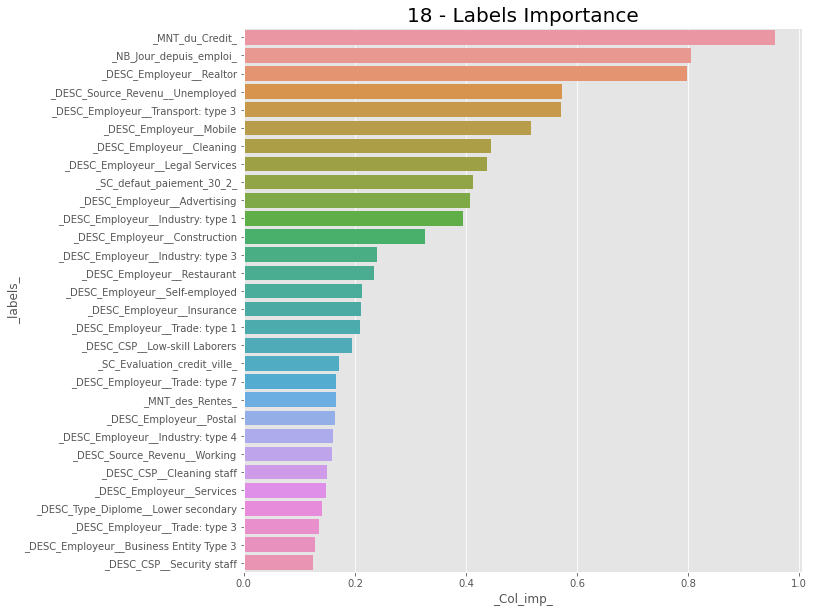

In [80]:
mCol_imp = pd.merge(col_name, imp_para_df, on="index")
mCol_imp = mCol_imp.sort_values(by=['_Col_imp_'], ascending=False)
mCol_imp = mCol_imp.reset_index()
mCol_imp.pop('level_0')
mCol_imp = mCol_imp.head(30)

#GraphNum(mCol_imp, "_Col_imp_","_labels_",'18 - Labels Importance')


plt.figure(figsize=(10, 10))
ax = sns.barplot(x="_Col_imp_", y="_labels_", data=mCol_imp, orient='h')
plt.title('18 - Labels Importance', fontsize=20)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '_DESC_CSP__High skill tech staff'),
  Text(0, 1, '_DESC_Employeur__Trade: type 4'),
  Text(0, 2, '_DESC_Statut_Familial__Married'),
  Text(0, 3, '_DESC_Type_Logement__Office apartment'),
  Text(0, 4, '_DESC_CSP__Accountants'),
  Text(0, 5, '_DESC_Employeur__Industry: type 5'),
  Text(0, 6, '_DESC_Employeur__Electricity'),
  Text(0, 7, '_DESC_Employeur__Industry: type 9'),
  Text(0, 8, '_DESC_Qui_Accompagne__Group of people'),
  Text(0, 9, '_DESC_Employeur__Emergency'),
  Text(0, 10, '_DESC_Employeur__University'),
  Text(0, 11, '_DESC_Employeur__Police'),
  Text(0, 12, '_DESC_proprio_logement__Y'),
  Text(0, 13, '_DESC_Employeur__Hotel'),
  Text(0, 14, '_DESC_proprio_logement__N'),
  Text(0, 15, '_DESC_Employeur__Industry: type 10'),
  Text(0, 16, '_SC_source_2_'),
  Text(0, 17, '_DESC_Employeur__Trade: type 2'),
  Text(0, 18, '_SC_defa

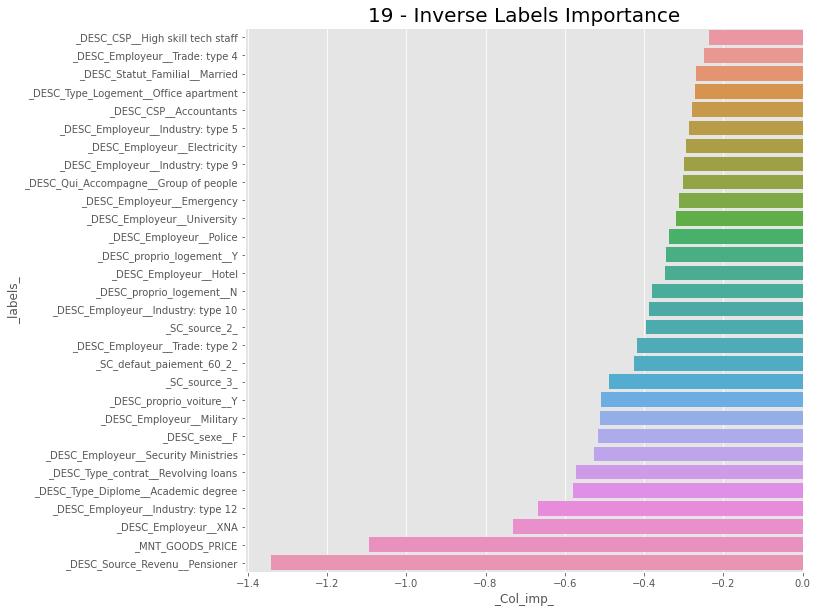

In [81]:
mCol_imp = pd.merge(col_name, imp_para_df, on="index")
mCol_imp = mCol_imp.sort_values(by=['_Col_imp_'], ascending=False)
mCol_imp = mCol_imp.reset_index()
mCol_imp.pop('level_0')
mCol_imp = mCol_imp.tail(30)

#GraphNum(mCol_imp, "_Col_imp_","_labels_",'18 - Labels Importance')


plt.figure(figsize=(10, 10))
ax = sns.barplot(x="_Col_imp_", y="_labels_", data=mCol_imp, orient='h')
plt.title('19 - Inverse Labels Importance', fontsize=20)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)

In [ ]:
Graph_Pie(labels,sizes,title): 
    
    